## Part I

In [1]:
#1. Import the libraries needed.

import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm

In [2]:
#2(1). Load the funding data in “nih-Worldwide2015.xls” into a DataFrame and visualize the first 5 rows.

data = pd.read_excel("nih-Worldwide2015.xls")
data[:5]

,Organization Name,Project Number,Funding Mechanism,NIH Reference,PI Name,Project Title,DEPT NAME,NIH Dept Combining Name,NIH MC Combining Name,Direct Cost,...,Funding,Congressional District,City,State or Country Name,Zip Code,Attributed to Medical School,Medical School Location,Institution Type,Award Notice Date,FOA
0,"21ST CENTURY THERAPEUTICS, INC.",5R43GM109528-02,RPGs - SBIR/STTR,8860204,"SHAW, JIAJIU",Development of a Novel ELISA Kit for Screening...,NaN,NONE,UNAVAILABLE,NaN,...,335740,13.0,DETROIT,MICHIGAN,48220,NaN,NaN,NaN,2015-05-08,PA11-335
1,"21ST CENTURY THERAPEUTICS, INC.",1R43AT008202-01A1,RPGs - SBIR/STTR,8832837,"CHEN, BEN D.",Novel Compounds from Sycamore Leaves for the T...,NaN,NONE,UNAVAILABLE,NaN,...,303745,13.0,DETROIT,MICHIGAN,48220,NaN,NaN,NaN,2015-08-10,PA14-071
2,"2B TECHNOLOGIES, INC.",2R44ES024031-02,RPGs - SBIR/STTR,8977721,"BIRKS, JOHN W",Personal Exposure Monitoring of the Air Pollut...,NaN,NONE,UNAVAILABLE,NaN,...,499734,2.0,BOULDER,COLORADO,NaN,NaN,NaN,None,2015-07-20,PA14-071
3,3-C INSTITUTE FOR SOCIAL DEVELOPMENT,271201400075C-1-0-0,R&D Contracts,9041442,"SANCHEZ, REBECCA",IGF::OT::IGF : ARISE: AN ONLINE RELAPSE PREVE...,NaN,NONE,UNAVAILABLE,NaN,...,70112,4.0,DURHAM,NORTH CAROLINA,27513,NaN,NaN,None,NaT,NaN
4,3-C INSTITUTE FOR SOCIAL DEVELOPMENT,2R44DA035014-02,RPGs - SBIR/STTR,8981102,"MCMILLEN, JANEY STURTZ",Web-based Tool for the Dissemination of Eviden...,NaN,NONE,UNAVAILABLE,NaN,...,562731,4.0,DURHAM,NORTH CAROLINA,27513,NaN,NaN,None,2015-09-08,PA14-071


In [3]:
#2(2). Display the dtypes of the columns.

print(data.dtypes)

Organization Name                       object
Project Number                          object
Funding Mechanism                       object
NIH Reference                            int64
PI Name                                 object
Project Title                           object
DEPT NAME                               object
NIH Dept Combining Name                 object
NIH MC Combining Name                   object
Direct Cost                            float64
Indirect Cost                          float64
Funding                                  int64
Congressional District                 float64
City                                    object
State or Country Name                   object
Zip Code                                object
Attributed to Medical School            object
Medical School Location                 object
Institution Type                        object
Award Notice Date               datetime64[ns]
FOA                                     object
dtype: object

In [4]:
#3. Show the projects that are attributed to a medical school.

data['Attributed to Medical School'].dropna()

231      Y
232      Y
233      Y
234      Y
236      Y
        ..
52204    Y
52205    Y
52206    Y
52207    Y
52208    Y
Name: Attributed to Medical School, Length: 25673, dtype: object

In [5]:
#4. Parse activity and institution codes according to the instructions below and store them as two new columns:
#‘code’ (activity code) and ‘icode’  (institution code).

data['code'] = data['Project Number'].str.slice(1, 4)
data['icode'] = data['Project Number'].str.slice(4, 6)
data[['Project Number', 'code', 'icode']]

,Project Number,code,icode
0,5R43GM109528-02,R43,GM
1,1R43AT008202-01A1,R43,AT
2,2R44ES024031-02,R44,ES
3,271201400075C-1-0-0,712,01
4,2R44DA035014-02,R44,DA
...,...,...,...
52229,2R44MD008597-03,R44,MD
52230,1R41CA192689-01,R41,CA
52231,2R44HD075429-02,R44,HD
52232,5R44GM100638-03,R44,GM


In [6]:
#5. Keep only records where the activity code contains at least a single letter in the English alphabet.

sub = data[data['code'].str.match('[A-Za-z]')]
sub[['Organization Name', 'Project Number', 'code', 'icode']]

,Organization Name,Project Number,code,icode
0,"21ST CENTURY THERAPEUTICS, INC.",5R43GM109528-02,R43,GM
1,"21ST CENTURY THERAPEUTICS, INC.",1R43AT008202-01A1,R43,AT
2,"2B TECHNOLOGIES, INC.",2R44ES024031-02,R44,ES
4,3-C INSTITUTE FOR SOCIAL DEVELOPMENT,2R44DA035014-02,R44,DA
5,3-C INSTITUTE FOR SOCIAL DEVELOPMENT,5R44MD007143-03,R44,MD
...,...,...,...,...
52229,"ZETROZ, INC.",2R44MD008597-03,R44,MD
52230,"ZONEONE PHARMA, INC.",1R41CA192689-01,R41,CA
52231,"ZONEONE PHARMA, INC.",2R44HD075429-02,R44,HD
52232,"ZUCHEM, INC.",5R44GM100638-03,R44,GM


In [7]:
#6. Find the 10 NIH institutes that gave the most funding.

sub.groupby(['icode'])[['Funding']].sum().sort_values(by=['Funding'], ascending=False).head(10)

,Funding
icode,
CA,3067378774
AI,2816658845
GM,2305153448
HL,2275682842
DK,1594835858
NS,1339911506
MH,1161677004
AG,999538398
HD,971449006


In [8]:
#7. Find the 10 Principal Investigators with the most number of grants

sub.groupby(['PI Name'])[['Project Number']].count().sort_values(by=['Project Number'], ascending=False).head(10)

,Project Number
PI Name,
"WOODLAND, DAVID L.",42
"STEWART, DAVID J.",30
"KAPLAN, DAVID L",12
"WANG, TIMOTHY CRAGIN",10
"CALIGIURI, MICHAEL A.",10
"SHARPLESS, NORMAN E",10
"ADAMSON, PETER C.",9
"SNYDER, MICHAEL P",9
"REZNIKOFF, WILLIAM S.",9


In [9]:
#8. Find the 10 organizations that have obtained the most diverse type of funding mechanisms. 

sub.groupby(['Organization Name'])[['code']].nunique().sort_values(by=['code'], ascending=False).head(10)

,code
Organization Name,
UNIVERSITY OF WASHINGTON,58
EMORY UNIVERSITY,54
WASHINGTON UNIVERSITY,53
UNIVERSITY OF CALIFORNIA LOS ANGELES,53
UNIVERSITY OF MICHIGAN,53
UNIVERSITY OF PITTSBURGH AT PITTSBURGH,53
UNIV OF NORTH CAROLINA CHAPEL HILL,52
UNIVERSITY OF PENNSYLVANIA,52
JOHNS HOPKINS UNIVERSITY,52


In [10]:
#9. Find the total funding and average funding given per each state/country.

sub.groupby(['State or Country Name'])[['Funding']].agg([('mean-funding', 'mean'), ('sum-funding', 'sum')])

Funding            
                        mean-funding sum-funding
State or Country Name                           
ALABAMA                456205.607774   258212374
ALASKA                 751715.777778    13530884
ARGENTINA              118947.571429      832633
ARIZONA                382628.363868   150372947
ARKANSAS               443106.120879    40322657
...                              ...         ...
WEST VIRGINIA          355504.220339    20974749
WISCONSIN              442692.426519   400636646
WYOMING                615290.764706    10459943
ZAMBIA                 880384.500000     1760769
ZIMBABWE               410204.857143     2871434

[98 rows x 2 columns]

In [11]:
#10(1). Load the “us-states.csv” file to keep only the US states and to create a separate column with the state acronym.

#read the csv without header, name them to State name and State acronym
us = pd.read_csv("us-states.csv", header = None, names=['State name', 'State acronym'])
#change state name to upper case and drop ',US'
us['State name'] = us['State name'].apply(str.upper).str.slice(0, -4) 
#merge to keep only the US states, and create the state acronym column
ussub = sub.merge(us, how='inner', left_on='State or Country Name', right_on='State name')
ussub[:5]

,Organization Name,Project Number,Funding Mechanism,NIH Reference,PI Name,Project Title,DEPT NAME,NIH Dept Combining Name,NIH MC Combining Name,Direct Cost,...,Zip Code,Attributed to Medical School,Medical School Location,Institution Type,Award Notice Date,FOA,code,icode,State name,State acronym
0,"21ST CENTURY THERAPEUTICS, INC.",5R43GM109528-02,RPGs - SBIR/STTR,8860204,"SHAW, JIAJIU",Development of a Novel ELISA Kit for Screening...,NaN,NONE,UNAVAILABLE,NaN,...,48220,NaN,NaN,NaN,2015-05-08,PA11-335,R43,GM,MICHIGAN,MI
1,"21ST CENTURY THERAPEUTICS, INC.",1R43AT008202-01A1,RPGs - SBIR/STTR,8832837,"CHEN, BEN D.",Novel Compounds from Sycamore Leaves for the T...,NaN,NONE,UNAVAILABLE,NaN,...,48220,NaN,NaN,NaN,2015-08-10,PA14-071,R43,AT,MICHIGAN,MI
2,ADVAITA CORPORATION,5R44GM108123-03,RPGs - SBIR/STTR,8840281,"VOICHITA, CALIN",Pathway analysis tools for personalized medici...,NaN,NONE,UNAVAILABLE,NaN,...,48170,NaN,NaN,None,2015-04-10,PAR09-220,R44,GM,MICHIGAN,MI
3,"ALLUVIUM BIOSCIENCES, INC.",1R43CA171485-01A1,RPGs - SBIR/STTR,8905429,"KITTENDORF, JEFFREY DAVID",Development of a heterologous bio-production s...,NaN,NONE,UNAVAILABLE,NaN,...,48104,NaN,NaN,None,2015-04-22,PA14-071,R43,CA,MICHIGAN,MI
4,ARBOR RESEARCH COLLABORATIVE FOR HEALTH,5R01MD006247-05,RPGs - Non SBIR/STTR,8780400,"TURENNE, MARC",Evaluating Payment Reform and Provider Practic...,NaN,NONE,UNAVAILABLE,250000.0,...,48104,NaN,NaN,None,2014-11-25,RFAMD11-001,R01,MD,MICHIGAN,MI


In [12]:
#10(2). Find the total funding and average funding given per each state

sub_p = ussub.groupby(['State name', 'State acronym'])[['Funding']].agg([('mean-funding', 'mean'), ('sum-funding', 'sum')]).reset_index()
#rename columns
sub_p['mean-funding']=sub_p['Funding']['mean-funding']
sub_p['sum-funding']=sub_p['Funding']['sum-funding']
sub_p = sub_p[['State name', 'State acronym', 'mean-funding', 'sum-funding']]
sub_p[:10]

,State name,State acronym,mean-funding,sum-funding
,,,,
0,ALABAMA,AL,456205.607774,258212374
1,ALASKA,AK,751715.777778,13530884
2,ARIZONA,AZ,382628.363868,150372947
3,ARKANSAS,AR,443106.120879,40322657
4,CALIFORNIA,CA,450849.829401,3401211113
5,COLORADO,CO,352274.696507,322683622
6,CONNECTICUT,CT,413336.751581,457563784
7,DELAWARE,DE,499291.520548,36448281
8,FLORIDA,FL,473755.755920,520183820


<AxesSubplot:xlabel='State acronym', ylabel='sum-funding'>

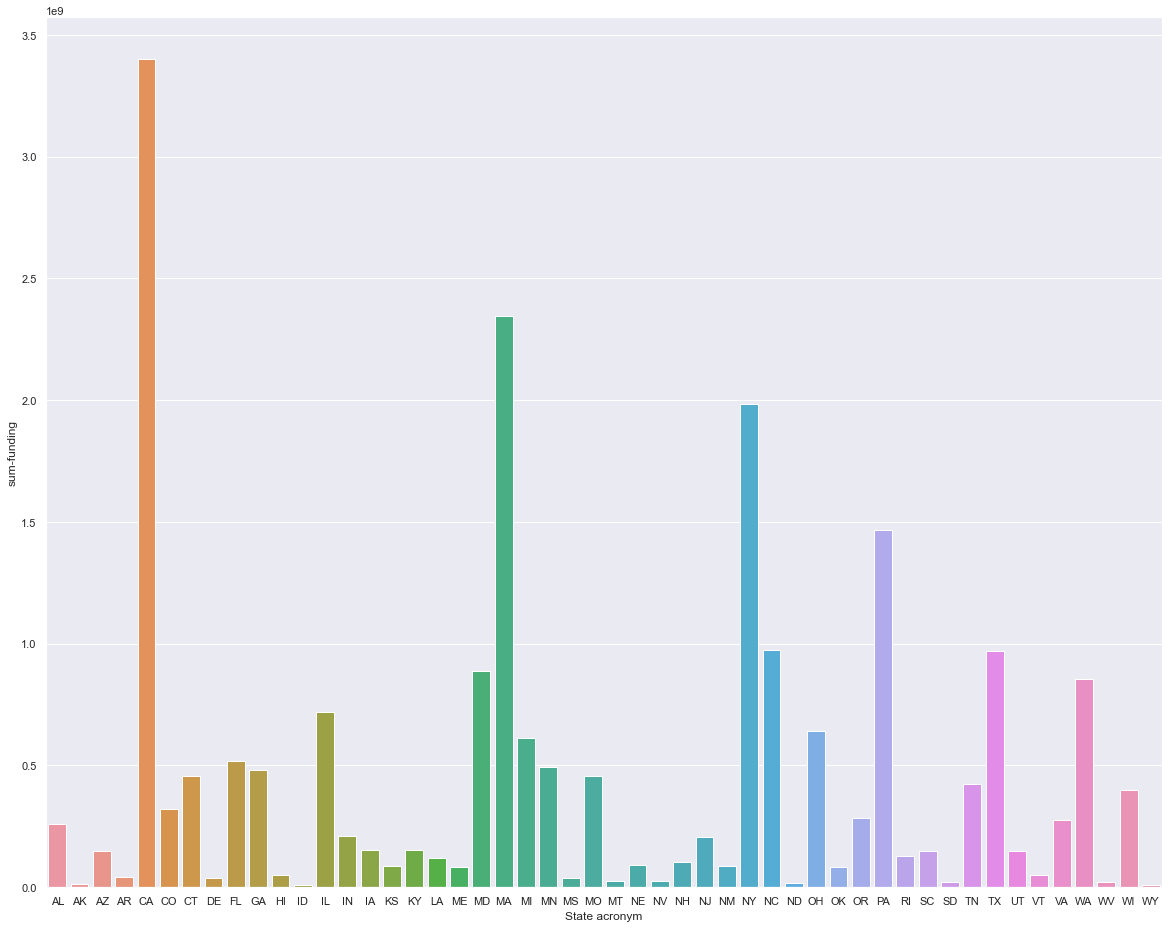

In [13]:
#11. Draw a bar plot with state acronyms in the x axis and total funding in the y axis. 

sns.set(rc={'figure.figsize':(20,16)})
sns.barplot(data=sub_p, x='State acronym', y='sum-funding')

## Part II

In [14]:
#12. Load the ‘papers.csv’ file to a DataFrame. Obtain the funding amounts for each of these projects.

#load the data
pp = pd.read_csv("papers.csv")
#merge it with the data dataframe
ppm = pp.merge(data, how='inner', on='Project Number')
#select the four columns we want
ppm = ppm[['Project Number', 'year', 'papersNum', 'Funding']]
ppm

,Project Number,year,papersNum,Funding
0,5R01NS082746-03,3,3,318529
1,5R01AI041576-18,18,0,399221
2,5R01EY025102-02,2,0,189262
3,3R01CA166588-04S1,4,0,78917
4,5R01CA158598-04,4,0,544193
...,...,...,...,...
4995,5R01GM107287-02,2,0,325070
4996,2R01AA019443-06A1,6,0,360521
4997,5R01DC001919-23,23,0,350274
4998,3R01HL110068-03S1,3,0,46905


<AxesSubplot:xlabel='Funding', ylabel='papersNum'>

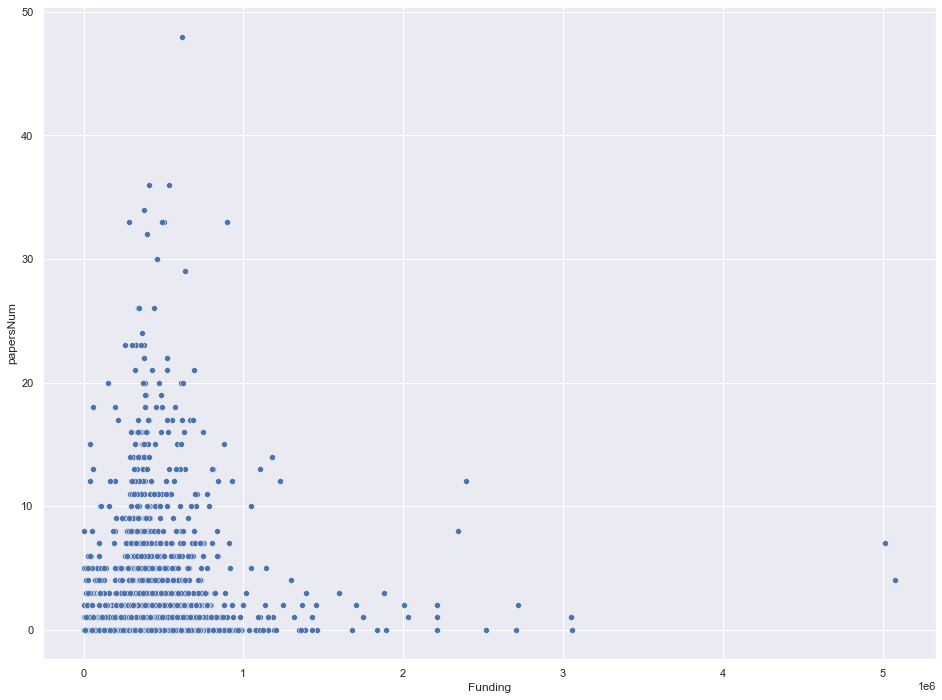

In [15]:
#13. Draw a scatter plot with Seaborn with ‘Funding’ in the x-axis and ‘papersNum’ in the y-axis.

sns.set(rc={'figure.figsize':(16,12)})
sns.scatterplot(data=ppm, x='Funding', y='papersNum')

In [16]:
#14. Now run a linear regression model adjusted for support year to evaluate whether there exists a
#relationship between the funding amount and the number of papers produced.

import statsmodels.api as sm
reg = ppm[['year', 'papersNum', 'Funding']]
reg = sm.add_constant(reg)
lsmod = sm.OLS(reg['papersNum'], reg[['const', 'year', 'Funding']]).fit()
lsmod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              papersNum   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     16.45
Date:                Tue, 31 Jan 2023   Prob (F-statistic):           7.54e-08
Time:                        10:30:22   Log-Likelihood:                -13145.
No. Observations:                5000   AIC:                         2.630e+04
Df Residuals:                    4997   BIC:                         2.631e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0150      0.109      9.303      0.000       0.801       1.229
year           0.0357      0.007      5.034      0.000       0.022       0.050
Funding     5.728e-07   2.14e-07      2.675      0.007    1.53e-07    9.93e-07
==============================================================================
Omnibus:                     4918.989   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           255684.936
Skew:                           4.828   Prob(JB):                         0.00
Kurtosis:                      36.676   Cond. No.                     1.08e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.08e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""